# An Initial Analysis
### Importing libraries

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

### Loading the train dataset and checking its values

In [ ]:
water_consumption = pd.read_csv("train.csv")
water_consumption.head(10)

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
5,2013,1,industrial,27,FHMG62751338090488,Installation_zone 2
6,2013,1,industrial,5,APVF78863215212358,Installation_zone 2
7,2013,1,domestic,31,MXWL75757930683403,Installation_zone 2
8,2013,1,industrial,2,NVMY31359391120094,Installation_zone 2
9,2013,1,industrial,0,PZAN37359795617576,Installation_zone 2


In [ ]:
water_consumption.describe()

,Year,Month,Consumption
count,329975.000000,329975.00000,329975.000000
mean,2016.774701,6.49955,6.724294
std,2.376551,3.51024,18.589004
min,2013.000000,1.00000,0.000000
25%,2014.000000,3.00000,1.000000
50%,2017.000000,6.00000,5.000000
75%,2019.000000,10.00000,9.000000
max,2020.000000,12.00000,4978.000000


There is a strange pick on the consumption that we keep at the moment.

<Axes: >

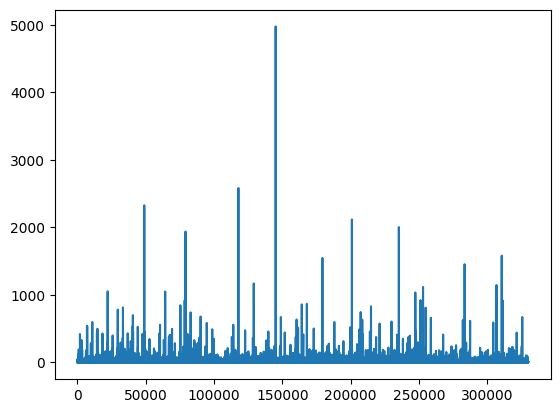

In [ ]:
water_consumption.Consumption.plot()

Displaying the quantity of items categorized by consumption type.

<Axes: title={'center': 'Consumer Type'}>

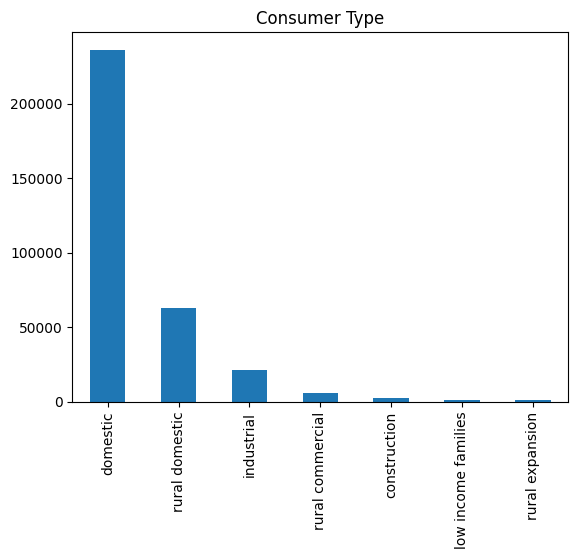

In [ ]:
water_consumption.Consumer_type.value_counts().plot(kind='bar', title="Consumer Type")

When we tally the various labels, it becomes evident that the dataset is imbalanced.

**How is the consumption by category?**


In [ ]:
water_zone = water_consumption.groupby(['Consumer_type'])
water_zone = water_zone['Consumption'].mean()
water_zone = water_zone.reset_index()

water_zone.head(10)

,Consumer_type,Consumption
0,construction,7.730201
1,domestic,6.810613
2,industrial,11.294819
3,low income families,9.031031
4,rural commercial,6.162967
5,rural domestic,4.898583
6,rural expansion,3.474157


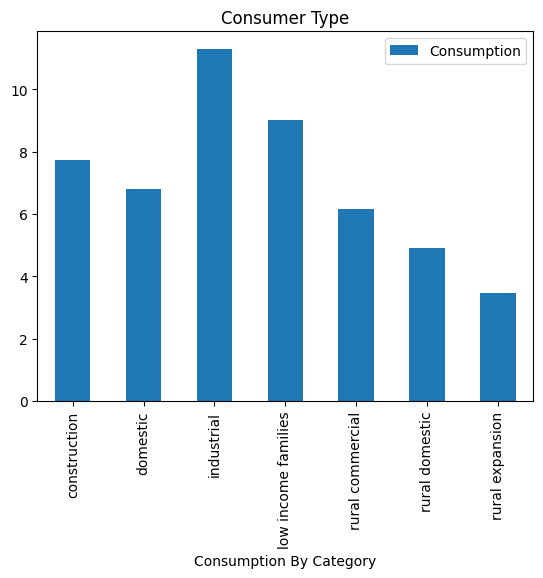

In [ ]:
ax = water_zone.plot(kind='bar', title="Consumer Type")
ax = ax.set_xticklabels(water_zone.Consumer_type, rotation=90)

plt.xlabel('Consumption By Category')

plt.show()

The consumption varies significantly depending on the category.

### Consumption on areas

It is interesting to check if every zone is balanced. Also, it is important to know if there are zones that consume more than others.

<Axes: title={'center': 'Installation Zone'}>

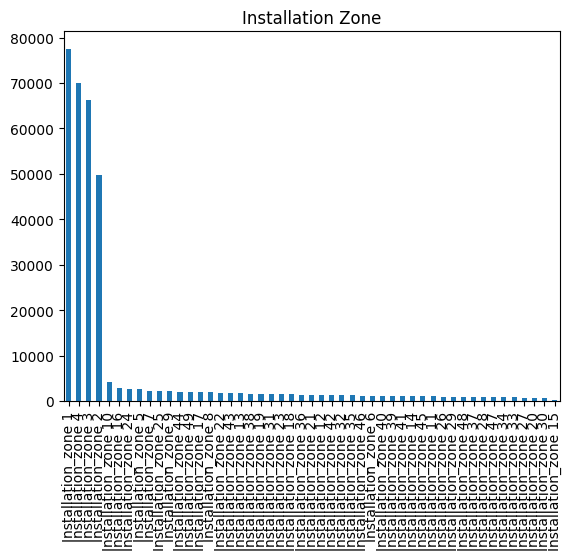

In [ ]:
water_consumption.Installation_zone.value_counts().plot(kind='bar', title="Installation Zone")

In this figure, we can observe that the zones are also imbalanced.

In [ ]:
water_zone = water_consumption.groupby(['Installation_zone'])
water_zone = water_zone['Consumption'].mean()
water_zone = water_zone.reset_index()

water_zone.head(10)

,Installation_zone,Consumption
0,Installation_zone 1,6.977282
1,Installation_zone 10,5.884588
2,Installation_zone 11,5.623031
3,Installation_zone 12,5.593382
4,Installation_zone 13,4.497938
5,Installation_zone 14,5.443082
6,Installation_zone 15,3.862222
7,Installation_zone 16,6.594556
8,Installation_zone 17,3.648510
9,Installation_zone 18,4.208361


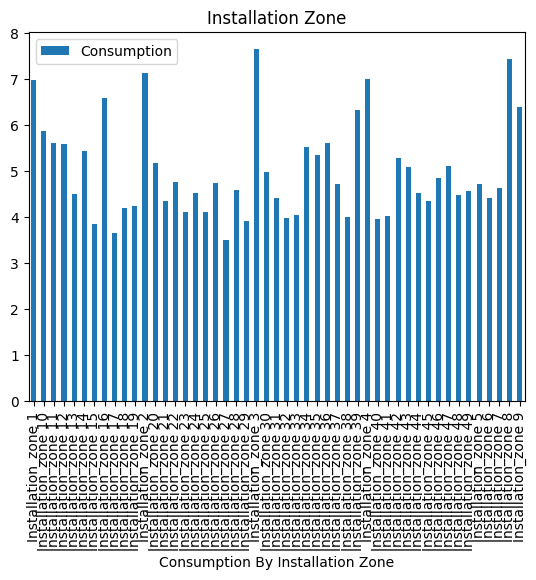

In [ ]:
ax = water_zone.plot(kind='bar', title="Installation Zone")
ax = ax.set_xticklabels(water_zone.Installation_zone, rotation=90)

plt.xlabel('Consumption By Installation Zone')

plt.show()

The consumption across the zones ranges from 3 to 8.

### The evolution of consumption over the years

In [ ]:
water_dates = water_consumption.groupby(['Year', 'Month'])
water_dates = water_dates['Consumption'].sum()
water_dates = water_dates.reset_index()

    Year  Month  Consumption
0   2013      1        28465
1   2013      2        23312
2   2013      3        22301
3   2013      4        23604
4   2013      5        26551
..   ...    ...          ...
79  2020      8        33431
80  2020      9        25686
81  2020     10        26206
82  2020     11        23397
83  2020     12        37883

[84 rows x 3 columns]


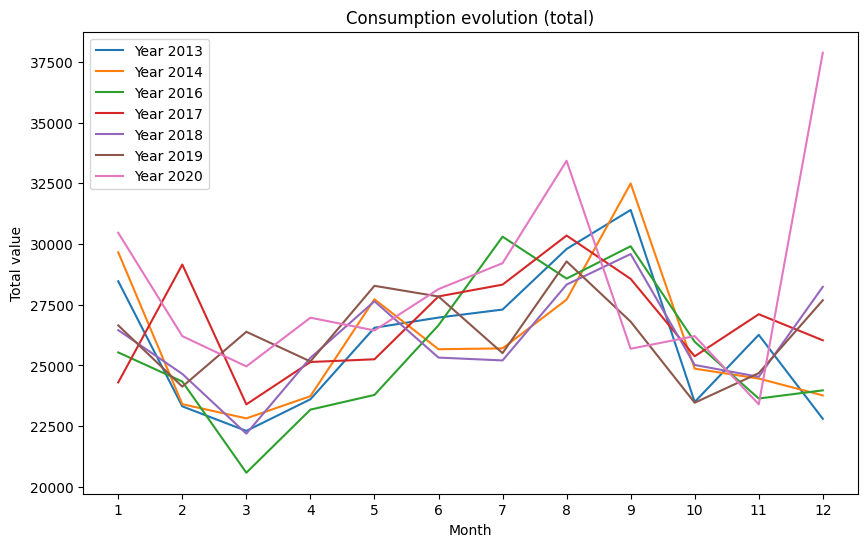

In [ ]:
plt.figure(figsize=(10, 6))
for año in water_dates['Year'].unique():
    water_year = water_dates[water_dates['Year'] == año]
    plt.plot(water_year['Month'], water_year['Consumption'], label=f'Year {año}')

plt.xlabel('Month')
plt.ylabel('Total value')
plt.xticks(water_dates['Month'].unique())
plt.legend()
plt.title('Consumption evolution (total)')
plt.show()

As expected, consumption varies throughout the months, with certain months experiencing an increase in consumption. Therefore, it is crucial to take into account the month we are in to determine consumption.

# Repetition

**Are there users who have changed their zone or category over the years?**

In [ ]:
repetition = water_consumption.groupby('Consumer_number').agg({'Installation_zone': 'nunique', 'Consumer_type': 'nunique'})
repetition.head(10)

,Installation_zone,Consumer_type
Consumer_number,,
AABH19026729995402,1,1
AABK96307399687530,1,1
AABP15829373762695,1,1
AABU83206956615238,1,1
AACK80576350114306,1,1
AACM38974282265332,1,1
AADB02534023128621,1,1
AADD80167034367129,1,1
AAET76171415183608,1,1


Users with two installation zones:

In [ ]:
repetition[repetition['Installation_zone'] != 1]

,Installation_zone,Consumer_type
Consumer_number,,
BHSW58845519265702,2,1
BSDP98709407046701,2,1
CFSJ18172140084526,2,1
HNZA43401522227119,2,2
WZCS67025215181054,2,1


In [ ]:
water_consumption[water_consumption['Consumer_number'] == 'BHSW58845519265702']

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
7894,2013,2,construction,0,BHSW58845519265702,Installation_zone 4
15662,2013,4,construction,2,BHSW58845519265702,Installation_zone 4
30777,2013,8,construction,7,BHSW58845519265702,Installation_zone 4
53708,2014,2,construction,4,BHSW58845519265702,Installation_zone 4
149768,2017,3,construction,11,BHSW58845519265702,Installation_zone 4
161257,2017,6,construction,6,BHSW58845519265702,Installation_zone 4
176449,2017,10,construction,7,BHSW58845519265702,Installation_zone 4
184030,2017,12,construction,7,BHSW58845519265702,Installation_zone 4
231188,2018,12,construction,23,BHSW58845519265702,Installation_zone 4
251786,2019,5,construction,36,BHSW58845519265702,Installation_zone 39


Users with two consumer type:

In [ ]:
repetition[repetition['Consumer_type'] != 1]

,Installation_zone,Consumer_type
Consumer_number,,
ABQN51363902836566,1,2
ABXI27042109759915,1,2
AHAV14287705487496,1,2
AJKB46444750490666,1,2
AJTB65706957169564,1,2
...,...,...
ZTXB62277071332927,1,2
ZUGZ15988493358322,1,2
ZVPB30380703049294,1,2


In [ ]:
water_consumption[water_consumption['Consumer_number'] == 'ABQN51363902836566']

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
265164,2019,9,domestic,6,ABQN51363902836566,Installation_zone 2
285822,2020,2,low income families,7,ABQN51363902836566,Installation_zone 2
301720,2020,6,low income families,10,ABQN51363902836566,Installation_zone 2
309465,2020,8,low income families,9,ABQN51363902836566,Installation_zone 2
317279,2020,10,low income families,10,ABQN51363902836566,Installation_zone 2
321124,2020,11,low income families,6,ABQN51363902836566,Installation_zone 2


Watching the repetitions both in the categories and in the areas of a user, perhaps it's a good option to treat them individually, using the different temporal records independently based on their category/ consumption area since, as these change, their consumption can vary significantly.